In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

We can create a dataset ad-hoc for our classification problem:

In [5]:
X, Y = make_classification(n_samples=1250, n_features=4, n_informative=2, random_state=0) 
#n_informative means how features are significant for the model

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# Gradient Descent

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
sgd = SGDClassifier(loss="log", shuffle = =True) 
#we are going to choose a logistic regression
#we need to choose the loss function

In [19]:
sgd.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
%%time
print("LOSS: %4f"%(log_loss(Y_test, sgd.predict_proba(X_test))))

LOSS: 0.275171
CPU times: user 1.96 ms, sys: 935 µs, total: 2.9 ms
Wall time: 2.05 ms


In [21]:
# Partial fit method: for mini batch gradient descent

In [30]:
def minibatchGD(train_set, test_set, n_batches, epochs):
    from sklearn.utils import shuffle
    X_train, Y_train = train_set
    X_test, Y_test = test_set
    
    batch_size = X_train.shape[0]/n_batches
    sgd = SGDClassifier(loss = "log")
    sgd_loss = []
    
    for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
                
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]
                
            sgd.partial_fit(X_batch, Y_batch, classes = np.unique(Y_train))
            loss = log_loss(Y_test, sgd.predict_proba(X_test), labels = np.unique(Y_train))
            sgd_loss.append(loss)
                
        print("Epoch Loss %d = %.4f" %(epoch+1,loss))
    return(sgd, sgd_loss)

In [34]:
# Full batch gradient descent: 
full_gd, full_gd_loss = minibatchGD((X_train, Y_train),(X_test, Y_test), n_batches = 1, epochs = 200)

Epoch Loss 1 = 1.8546
Epoch Loss 2 = 0.4466
Epoch Loss 3 = 0.3135
Epoch Loss 4 = 0.3167
Epoch Loss 5 = 0.2541
Epoch Loss 6 = 0.2755
Epoch Loss 7 = 0.1970
Epoch Loss 8 = 0.1531
Epoch Loss 9 = 0.1882
Epoch Loss 10 = 0.1145
Epoch Loss 11 = 0.1354
Epoch Loss 12 = 0.1614
Epoch Loss 13 = 0.1189
Epoch Loss 14 = 0.1308
Epoch Loss 15 = 0.1406
Epoch Loss 16 = 0.1393
Epoch Loss 17 = 0.1640
Epoch Loss 18 = 0.1088
Epoch Loss 19 = 0.1486
Epoch Loss 20 = 0.1200
Epoch Loss 21 = 0.1117
Epoch Loss 22 = 0.1404
Epoch Loss 23 = 0.1117
Epoch Loss 24 = 0.1232
Epoch Loss 25 = 0.1294
Epoch Loss 26 = 0.1112
Epoch Loss 27 = 0.1130
Epoch Loss 28 = 0.1243
Epoch Loss 29 = 0.1166
Epoch Loss 30 = 0.1080
Epoch Loss 31 = 0.1129
Epoch Loss 32 = 0.1119
Epoch Loss 33 = 0.1060
Epoch Loss 34 = 0.1154
Epoch Loss 35 = 0.1085
Epoch Loss 36 = 0.1079
Epoch Loss 37 = 0.1154
Epoch Loss 38 = 0.1259
Epoch Loss 39 = 0.1055
Epoch Loss 40 = 0.1109
Epoch Loss 41 = 0.1061
Epoch Loss 42 = 0.1108
Epoch Loss 43 = 0.1092
Epoch Loss 44 = 0.10

In [35]:
# Stocastic gradient descent: 
sgd, sgd_loss = minibatchGD((X_train, Y_train),(X_test, Y_test), n_batches = X_train.shape[0], epochs = 5)

Epoch Loss 1 = 0.9124
Epoch Loss 2 = 0.5437
Epoch Loss 3 = 0.8821
Epoch Loss 4 = 0.4267
Epoch Loss 5 = 0.1993


In [42]:
# Mini batch gradient descent:
mini_gd, mini_gd_loss = minibatchGD((X_train, Y_train),(X_test, Y_test), n_batches = 10, epochs = 50)

Epoch Loss 1 = 3.5748
Epoch Loss 2 = 0.7002
Epoch Loss 3 = 0.3205
Epoch Loss 4 = 0.3865
Epoch Loss 5 = 0.1731
Epoch Loss 6 = 0.2457
Epoch Loss 7 = 0.1818
Epoch Loss 8 = 0.1524
Epoch Loss 9 = 0.2584
Epoch Loss 10 = 0.1617
Epoch Loss 11 = 0.1578
Epoch Loss 12 = 0.1428
Epoch Loss 13 = 0.1380
Epoch Loss 14 = 0.1267
Epoch Loss 15 = 0.1302
Epoch Loss 16 = 0.1127
Epoch Loss 17 = 0.1114
Epoch Loss 18 = 0.1208
Epoch Loss 19 = 0.1166
Epoch Loss 20 = 0.2227
Epoch Loss 21 = 0.1102
Epoch Loss 22 = 0.1101
Epoch Loss 23 = 0.1171
Epoch Loss 24 = 0.1492
Epoch Loss 25 = 0.1126
Epoch Loss 26 = 0.1471
Epoch Loss 27 = 0.1257
Epoch Loss 28 = 0.1119
Epoch Loss 29 = 0.1104
Epoch Loss 30 = 0.1158
Epoch Loss 31 = 0.1120
Epoch Loss 32 = 0.1100
Epoch Loss 33 = 0.1082
Epoch Loss 34 = 0.1206
Epoch Loss 35 = 0.1240
Epoch Loss 36 = 0.1207
Epoch Loss 37 = 0.1140
Epoch Loss 38 = 0.1150
Epoch Loss 39 = 0.1141
Epoch Loss 40 = 0.1148
Epoch Loss 41 = 0.1110
Epoch Loss 42 = 0.1111
Epoch Loss 43 = 0.1138
Epoch Loss 44 = 0.10

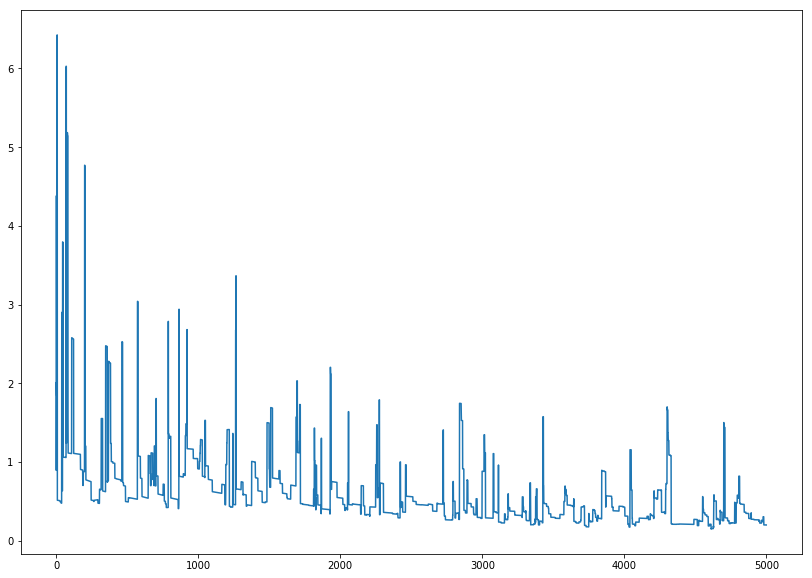

In [39]:
# Let's visualize it: 
plt.rcParams['figure.figsize'] = (14,10)
plt.plot(sgd_loss, label = "Stochastic")

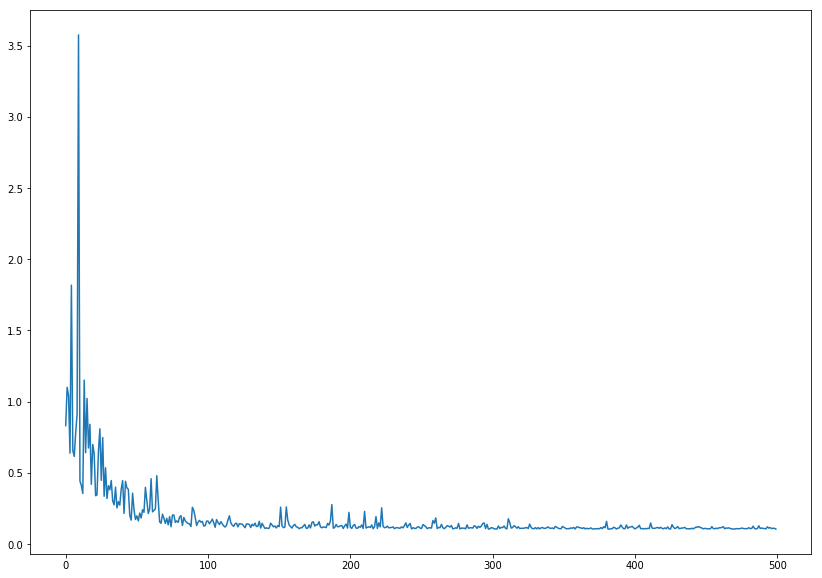

In [43]:
plt.plot(mini_gd_loss, label = "Mini Batch")

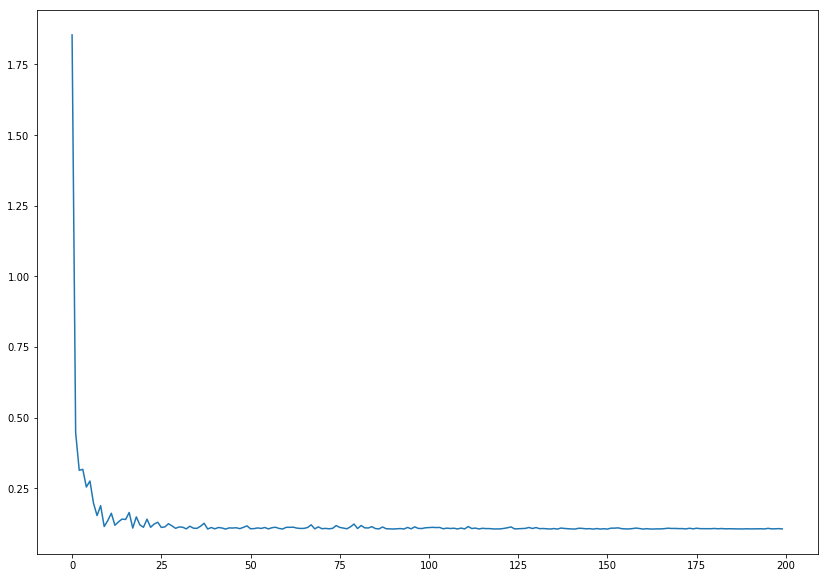

In [45]:
plt.plot(full_gd_loss, label = "Full Batch")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


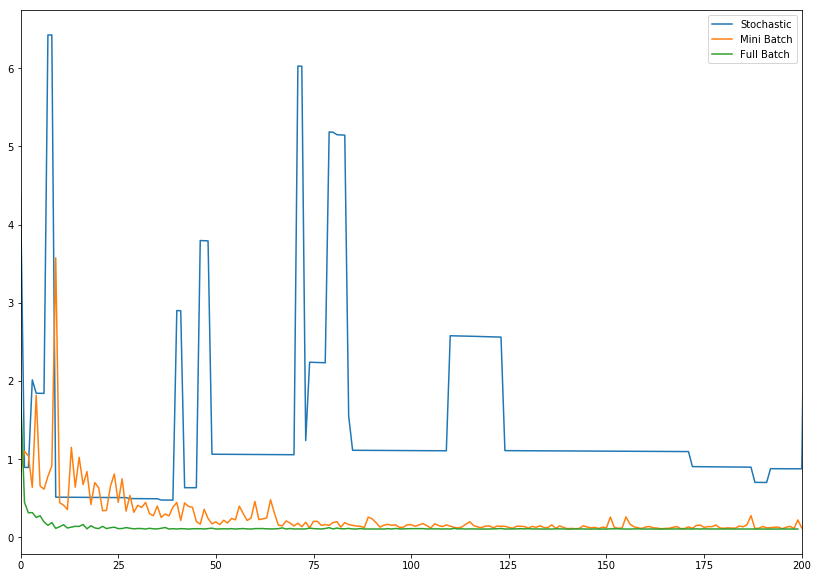

In [47]:
%matplotlib inline
plt.figure(figsize=(14,10))
plt.plot(sgd_loss, label="Stochastic")
plt.plot(mini_gd_loss, label="Mini Batch")
plt.plot(full_gd_loss,label="Full Batch")
plt.xlim(xmin=0,xmax=200)
plt.legend()
plt.show()

# Cross-Validation: 


In [50]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
X = iris.drop("class",axis=1).values
Y = iris["class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

__K-folds Cross Validation method__

In [53]:
from sklearn.model_selection import KFold

lr = LogisticRegression()

kfold = KFold(n_splits=10, random_state=1)
scores = []
              
for k, (train, test) in enumerate(kfold.split(X_train)):
    lr.fit(X_train[train], Y_train[train])
    score = lr.score(X_train[test],Y_train[test])
    scores.append(score)
    print("Fold %d: Accuracy=%.2f" %(k, score))

Fold 0: Accuracy=0.91
Fold 1: Accuracy=0.91
Fold 2: Accuracy=0.91
Fold 3: Accuracy=0.91
Fold 4: Accuracy=1.00
Fold 5: Accuracy=1.00
Fold 6: Accuracy=0.90
Fold 7: Accuracy=1.00
Fold 8: Accuracy=0.80
Fold 9: Accuracy=0.90


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


In [55]:
#We can compute the overall accuracy like the mean of each score:
accuracy = np.array(scores).mean()
print("\nValidation Accuracy = %.2f" % accuracy)


Validation Accuracy = 0.92


With this approach classes could be unbalanced, so we can compute the __StratifiedKFold__ for avoiding this problem 

In [56]:
from sklearn.model_selection import StratifiedKFold

lr = LogisticRegression()

kfold = StratifiedKFold(n_splits=10, random_state=1)
scores = []
              
for k, (train, test) in enumerate(kfold.split(X_train,Y_train)):
    lr.fit(X_train[train], Y_train[train])
    score = lr.score(X_train[test],Y_train[test])
    scores.append(score)
    print("Fold %d: Accuracy=%.2f" %(k, score))
    
print("\nValidation Accuracy = %.2f" % (np.array(scores).mean()))

Fold 0: Accuracy=0.83
Fold 1: Accuracy=0.92
Fold 2: Accuracy=0.91
Fold 3: Accuracy=1.00
Fold 4: Accuracy=1.00
Fold 5: Accuracy=0.91
Fold 6: Accuracy=1.00
Fold 7: Accuracy=0.89
Fold 8: Accuracy=1.00
Fold 9: Accuracy=1.00

Validation Accuracy = 0.95


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


We have another option for avoiding the unbalanced classes inside the k-folds:

In [59]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, Y_train, cv=10)

for fold,score in enumerate(scores):
    print("Fold %d score=%.4f" % (fold+1,score))
    
print("\nValidation Accuracy = %.2f" % scores.mean())
scores.mean()

Fold 1 score=0.8333
Fold 2 score=0.9167
Fold 3 score=0.9091
Fold 4 score=1.0000
Fold 5 score=1.0000
Fold 6 score=0.9091
Fold 7 score=1.0000
Fold 8 score=0.8889
Fold 9 score=1.0000
Fold 10 score=1.0000

Validation Accuracy = 0.95


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


0.9457070707070707

In [58]:
#At the end we need to test all the training set: 
lr.fit(X_train, Y_train) #this is the model to be tested

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# How to find the right combination of hyperparameters?

# _Grid search:_

• Different values are defined for different hyperparameters and all combinations are tested (one model for each hyparameter, take out the best).

• Computational power  --> very high!

In [60]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
X = iris.drop("class",axis=1).values
Y = iris["class"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [71]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV #it's implement with CrossValidation

svc = SVC()

params = {"kernel": ["linear","rbf","sigmoid","poly"],
             "C": [1, 10, 100, 1000], # C = 1/gamma
             "gamma": [0.1,1,"auto"]} #auto 1/n where n = number of features

gs = GridSearchCV(svc, params, cv=10) #in cv specifichiamo il numero di folds per la cross-validation

gs.fit(X_train, Y_train)

CPU times: user 763 ms, sys: 7.36 ms, total: 770 ms
Wall time: 782 ms


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
gs.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [73]:
gs.best_score_

0.9809523809523809

In [74]:
svc = gs.best_estimator_ #this is the best model

In [75]:
svc.score(X_test, Y_test)

0.9777777777777777

# Random search: 
• When the hyparameters have different relevance:
which searches for the optimal values of the hyperparameters searching them at random in a distribution of values defined by us.
Experimental evidence has shown that this approach leads to better results and faster than Grid Search. We can implement Random Search using the RandomizedSearchCV class of scikit-learn.

In [76]:
from sklearn.model_selection import RandomizedSearchCV

svc = SVC()
rs = RandomizedSearchCV(svc, params, cv = 10)

In [77]:
rs.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'C': [1, 10, 100, 1000], 'gamma': [0.1, 1, 'auto']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [79]:
rs.best_score_

0.9714285714285714

In [80]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 1}